In [1]:
import os
# running from Root directory
os.chdir("..")

In [3]:
from connectome import Connectome
from connectome_network import ConnectomeNetwork
from connectome_types import SynapseSide, cell_types, ClfType, m_types, CONNECTOME_NEURON_TABLE_PATH
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from collections import Counter
clf_type_space = [e.value for e in ClfType]

In [4]:
neurons_df = pd.read_csv(CONNECTOME_NEURON_TABLE_PATH)
print(len(neurons_df))
neurons_df.head()

71736


,Unnamed: 0,volume,clf_type,cell_type,mtype,pre_synapses,post_synapses,ds_num_of_post_synapses,ds_num_of_pre_synapses,ds_pre_syn_weight,root_id,pre_syn_weight,ex_pre_syn_weight,inh_pre_syn_weight
0,0,234.475029,E,6P-IT,L6tall-c,1,0,3,50,4245.760000,864691134784325628,1096.000000,1096.000000,NaN
1,1,313.159680,E,6P-IT,L6tall-c,0,1,4,68,4804.588235,864691134807855033,NaN,NaN,NaN
2,2,318.771200,E,6P-IT,L6short-a,50,5,9,1661,6338.362432,864691134884743162,5991.680000,6356.888889,5562.956522
3,3,207.237120,E,6P-IT,L6short-b,25,17,28,659,7949.116844,864691134884747514,4935.680000,5514.800000,2619.200000
4,4,205.180109,E,6P-CT,L6tall-a,95,330,557,1779,6489.351321,864691134884754426,5751.284211,5548.327869,6115.411765


### Number of pre synapses (In degree dist)

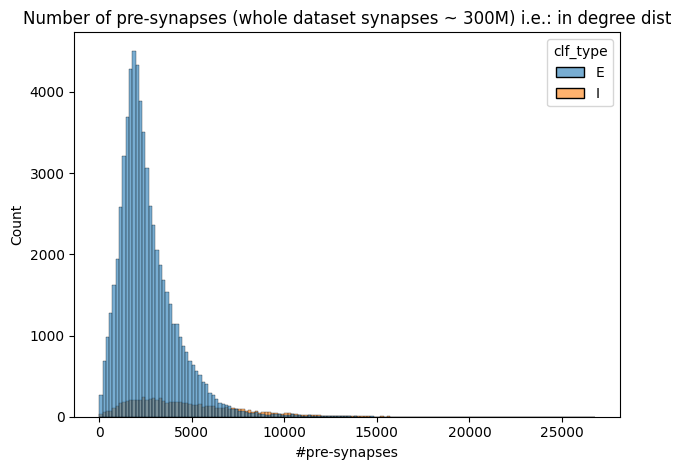

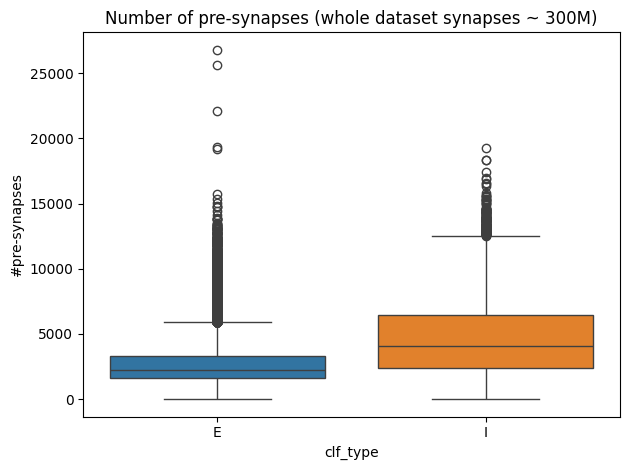

In [57]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="ds_num_of_pre_synapses", hue="clf_type",bins=150,
             alpha=0.6, ax=ax)
ax.set_title("Number of pre-synapses (whole dataset synapses ~ 300M) i.e.: in degree dist");
ax.set_xlabel("#pre-synapses");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="clf_type", y="ds_num_of_pre_synapses", hue="clf_type", data=neurons_df)
plt.title("Number of pre-synapses (whole dataset synapses ~ 300M)")
plt.ylabel("#pre-synapses")
plt.tight_layout();plt.show()

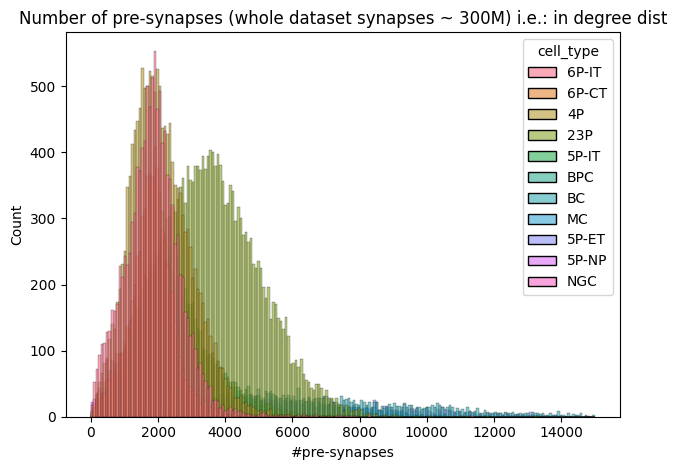

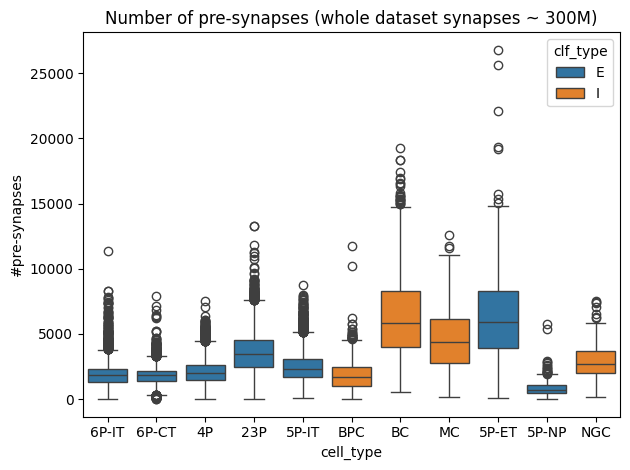

In [59]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="ds_num_of_pre_synapses", hue="cell_type",bins=200,binrange=(0, 15000),
             alpha=0.6, ax=ax)
ax.set_title("Number of pre-synapses (whole dataset synapses ~ 300M) i.e.: in degree dist");
ax.set_xlabel("#pre-synapses");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="cell_type", y="ds_num_of_pre_synapses", hue="clf_type", data=neurons_df)
plt.title("Number of pre-synapses (whole dataset synapses ~ 300M)")
plt.ylabel("#pre-synapses")
plt.tight_layout();plt.show()

### Sum of pre-synaptic weights

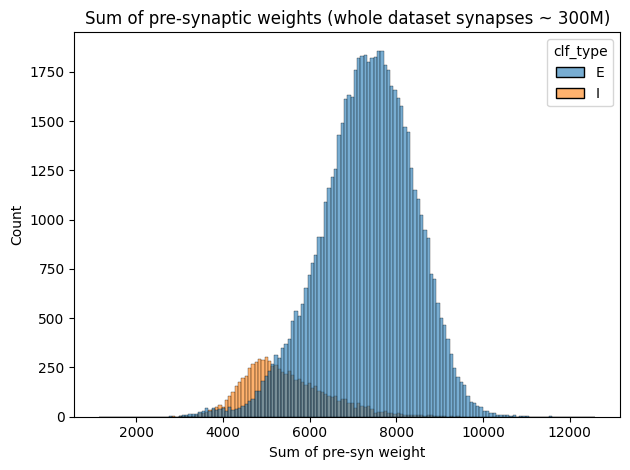

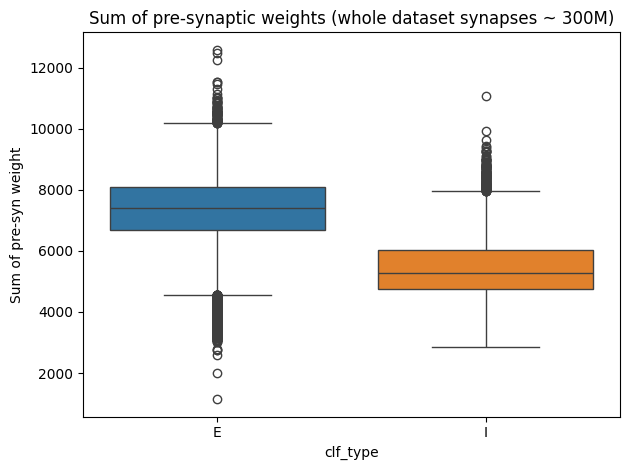

In [39]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="ds_pre_syn_weight", hue="clf_type",bins=150,
             alpha=0.6, ax=ax)
ax.set_title("Sum of pre-synaptic weights (whole dataset synapses ~ 300M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="clf_type", y="ds_pre_syn_weight", hue="clf_type", data=neurons_df)
plt.title("Sum of pre-synaptic weights (whole dataset synapses ~ 300M)")
plt.ylabel("Sum of pre-syn weight")
plt.tight_layout();plt.show()

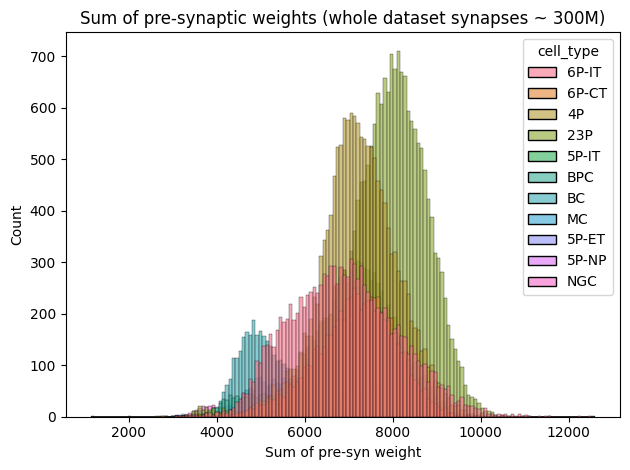

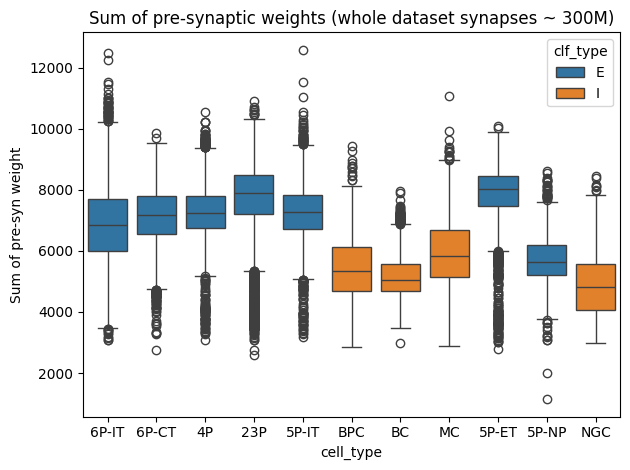

In [38]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="ds_pre_syn_weight", hue="cell_type",bins=150,
             alpha=0.6, ax=ax)
ax.set_title("Sum of pre-synaptic weights (whole dataset synapses ~ 300M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="cell_type", y="ds_pre_syn_weight", hue="clf_type", data=neurons_df)
plt.title("Sum of pre-synaptic weights (whole dataset synapses ~ 300M)")
plt.ylabel("Sum of pre-syn weight")
plt.tight_layout();plt.show()

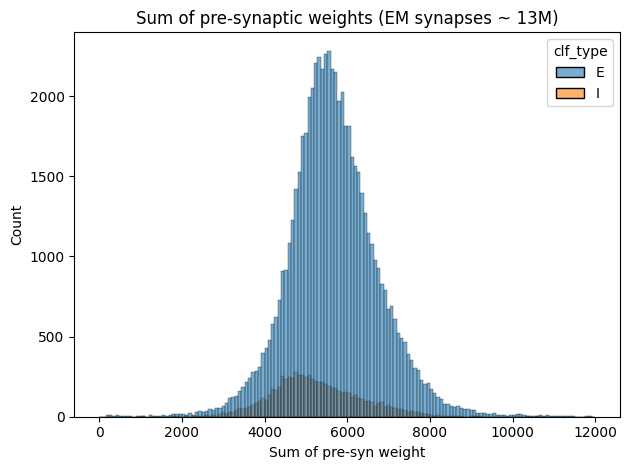

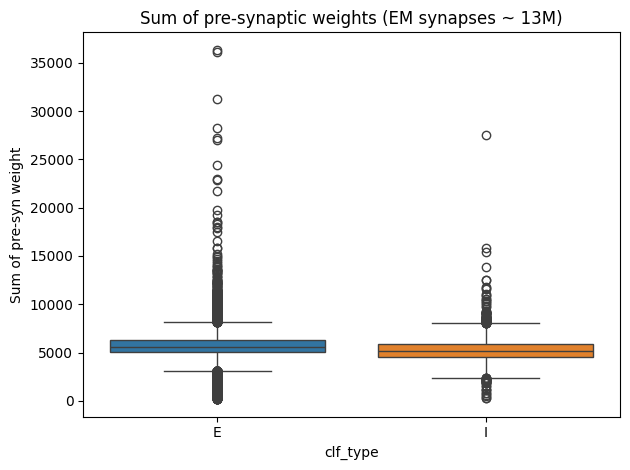

In [40]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="pre_syn_weight", hue="clf_type",bins=150,
             alpha=0.6, ax=ax, binrange=(0, 12000))
ax.set_title("Sum of pre-synaptic weights (EM synapses ~ 13M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="clf_type", y="pre_syn_weight", hue="clf_type", data=neurons_df)
plt.title("Sum of pre-synaptic weights (EM synapses ~ 13M)")
plt.ylabel("Sum of pre-syn weight")
plt.tight_layout();plt.show()

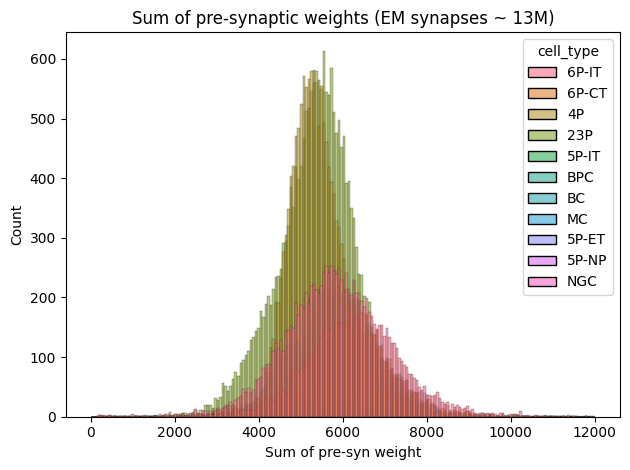

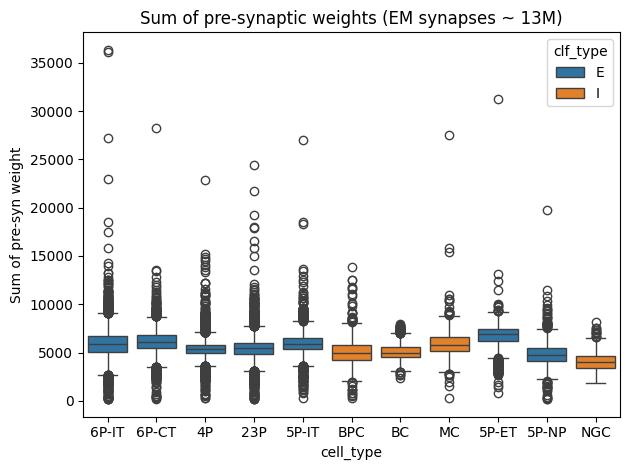

In [41]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="pre_syn_weight", hue="cell_type",bins=200,
             alpha=0.6, ax=ax, binrange=(0, 12000))
ax.set_title("Sum of pre-synaptic weights (EM synapses ~ 13M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="cell_type", y="pre_syn_weight", hue="clf_type", data=neurons_df)
plt.title("Sum of pre-synaptic weights (EM synapses ~ 13M)")
plt.ylabel("Sum of pre-syn weight")
plt.tight_layout();plt.show()

#### Special featurs the EM has: we can look at "labeled" weights, i.e.: from excitatory, inhibitory, from BC...

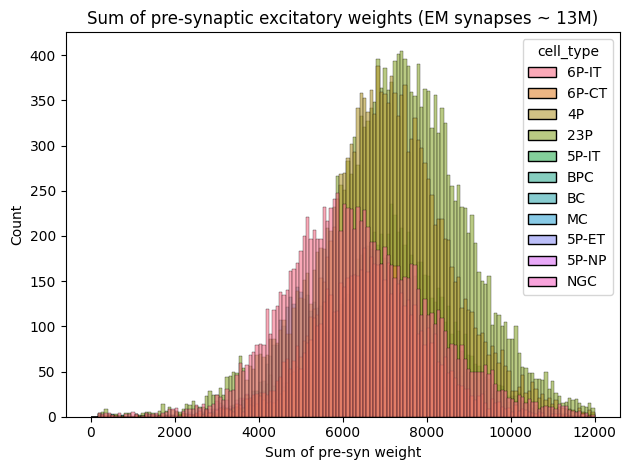

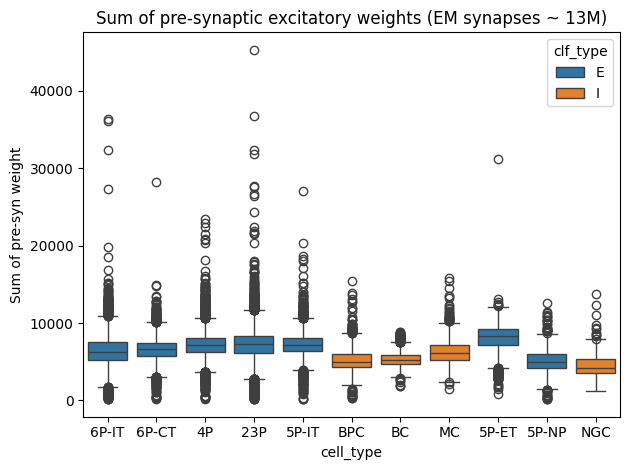

In [44]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="ex_pre_syn_weight", hue="cell_type",bins=150,
             alpha=0.6, ax=ax, binrange=(0, 12000))
ax.set_title("Sum of pre-synaptic excitatory weights (EM synapses ~ 13M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="cell_type", y="ex_pre_syn_weight", hue="clf_type", data=neurons_df)
plt.title("Sum of pre-synaptic excitatory weights (EM synapses ~ 13M)")
plt.ylabel("Sum of pre-syn weight")
plt.tight_layout();plt.show()

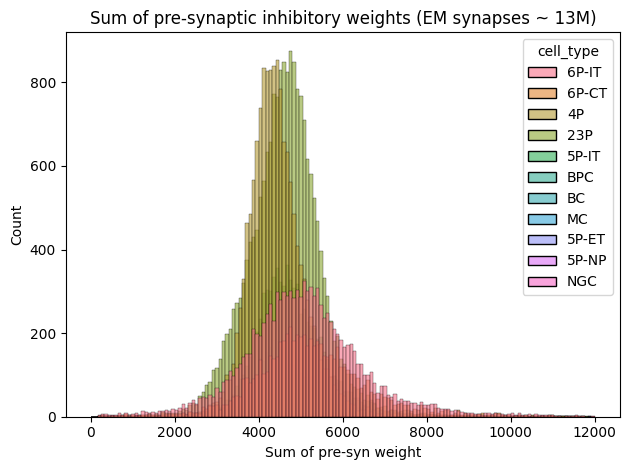

In [43]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="inh_pre_syn_weight", hue="cell_type",bins=150,
             alpha=0.6, ax=ax, binrange=(0, 12000))
ax.set_title("Sum of pre-synaptic inhibitory weights (EM synapses ~ 13M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

### Volume

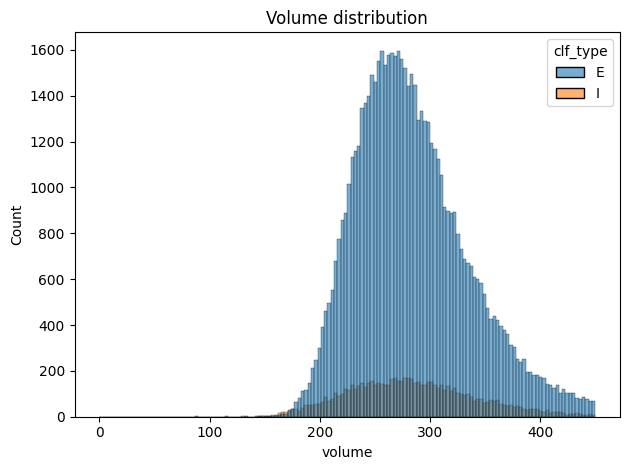

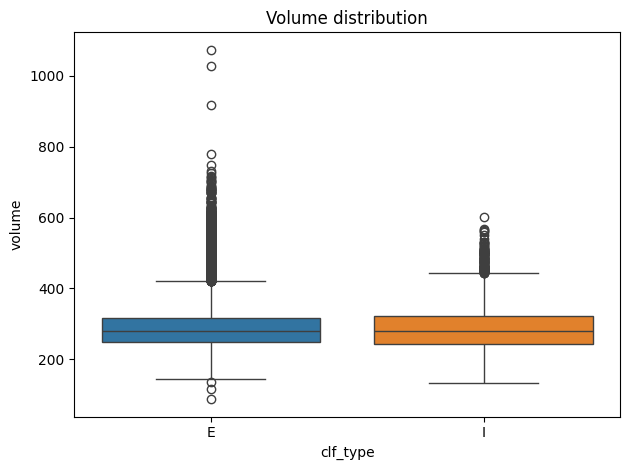

In [48]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="volume", hue="clf_type",bins=150,binrange=(0, 450),
             alpha=0.6, ax=ax)
ax.set_title("Volume distribution");
ax.set_xlabel("volume");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="clf_type", y="volume", hue="clf_type", data=neurons_df)
plt.title("Volume distribution")
plt.ylabel("volume")
plt.tight_layout();plt.show()

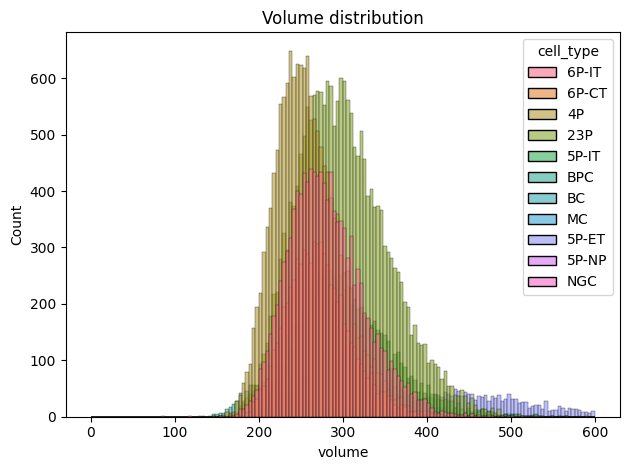

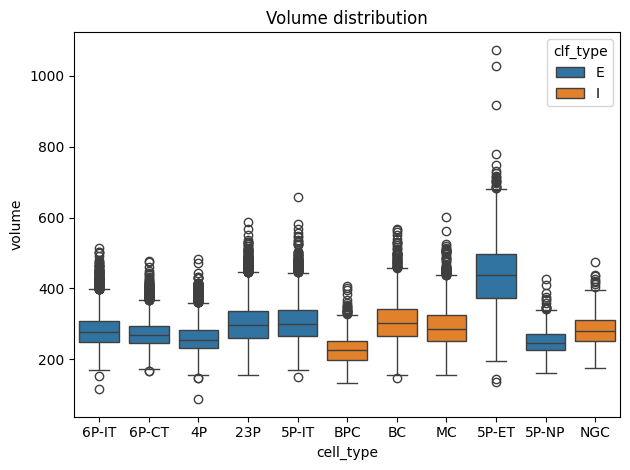

In [50]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="volume", hue="cell_type",bins=150,binrange=(0, 600),
             alpha=0.6, ax=ax)
ax.set_title("Volume distribution");
ax.set_xlabel("volume");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="cell_type", y="volume", hue="clf_type", data=neurons_df)
plt.title("Volume distribution")
plt.ylabel("volume")
plt.tight_layout();plt.show()

### pre-synaptic weights vs. num of pre-synapses

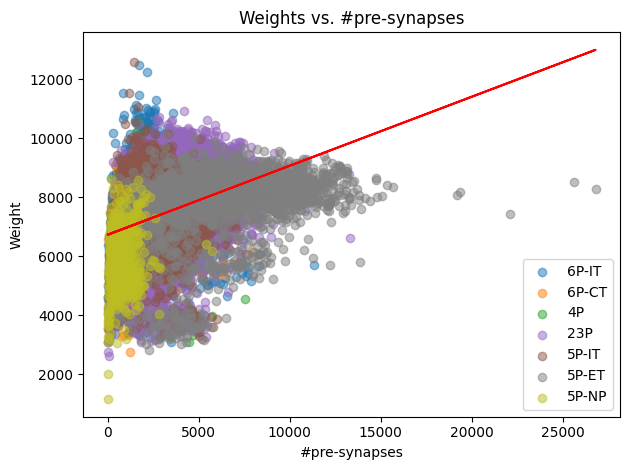

In [71]:
def weight_v_num_of_pre(df, color):
    X = df['ds_num_of_pre_synapses']
    y = df['ds_pre_syn_weight']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    unique_types = df[color].unique()
    color_map = plt.colormaps['tab10']
    color_dict = {t: color_map(i/len(unique_types)) for i, t in enumerate(unique_types)}
    for t in unique_types:
        mask = df[color] == t
        plt.scatter(df.loc[mask, 'ds_num_of_pre_synapses'], 
                    df.loc[mask, 'ds_pre_syn_weight'], 
                    alpha=0.5, 
                    c=[color_dict[t]], 
                    label=t)
    
    plt.plot(df['ds_num_of_pre_synapses'], model.predict(X), color='red')
    plt.title("Weights vs. #pre-synapses"); plt.ylabel("Weight"); plt.xlabel("#pre-synapses");
    plt.tight_layout();plt.legend(); plt.show()


weight_v_num_of_pre(neurons_df[neurons_df['clf_type'] == 'E'], color='cell_type')

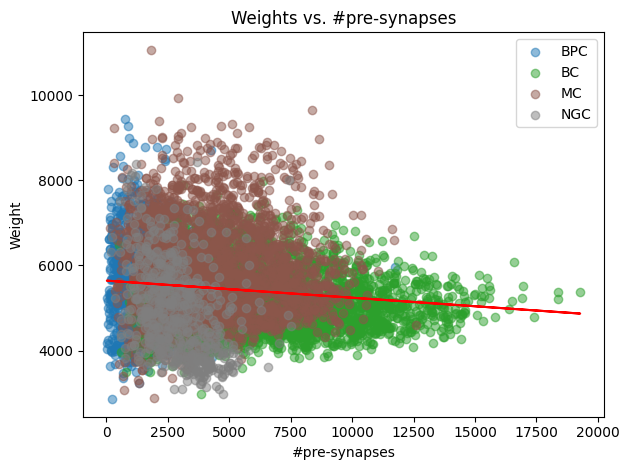

In [72]:
weight_v_num_of_pre(neurons_df[neurons_df['clf_type'] == 'I'], color='cell_type')